## Visualization with the pandas package

### Students notebook

#### Time to publish!

Your PhD defence was a success! Congratulations, doctor! Now you want to write one more publication out of unpublished material still sitting in your PhD thesis. Before that you need to summarize your data in beautiful, informative plots. Let's do this with Python!

In [1]:
# loading packages
import pandas as pd

# reading the bcell_data.csv file 
data = pd.read_csv('./data/bcell_data.csv', index_col = 0)

# showing the content of data in standard output
data

,cell_type,sex,IKZF1,MYC,MAPK1
sample,,,,,
s1,preB,female,17.232815,17.256758,8.864175
s2,preB,male,11.938779,12.497435,3.871096
s3,preB,female,10.153002,10.834510,10.789578
s4,preB,male,12.516865,12.115241,7.177412
s5,preB,female,11.231450,12.074468,3.356356
...,...,...,...,...,...
s96,immatureB,male,5.160727,4.994283,5.961980
s97,immatureB,female,11.076917,10.991495,7.214951
s98,immatureB,male,7.714327,8.020823,3.610367


Great, let's make a barplot showing the joint distribution of the `cell_type` and `sex` variables

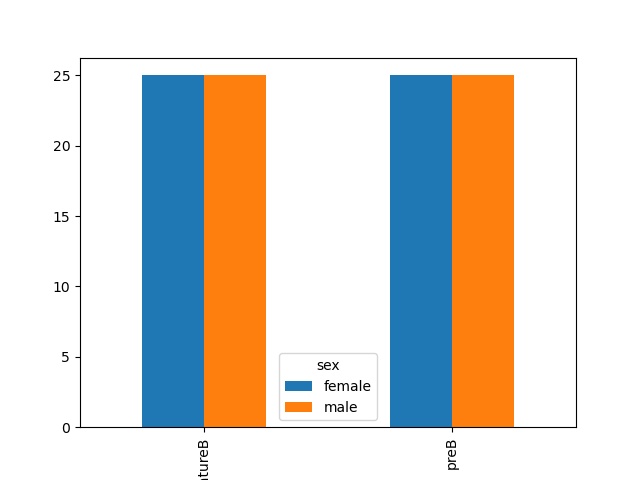

In [3]:
# Coursera notebook will not allow to import this image in markdown, so we go with the PIL package
from PIL import Image
with Image.open("./figures/cell_type_and_sex.png") as im:
    display(im)

Text(0, 0.5, 'count')

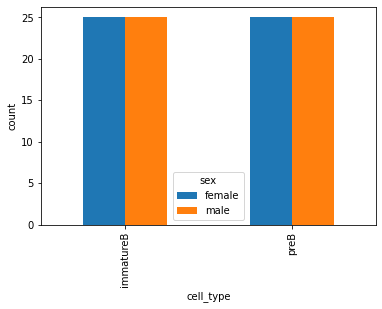

In [15]:
# exercise: try to replicate the plot above.
# use pandas functionality to recreat the plot above containing 
# the number of samples for each combination of cell_type and sex values
# tip: use crosstab for deriving the joint distribution of cell_type and sex
# tip: use pandas plot functionalities on the resulting data frame for creating a bar plot

# Your code here
# نعمل جدول بعدّ العينات لكل تركيب من cell_type و sex
type_x_sex = pd.crosstab(data["cell_type"], data["sex"])

# نرسم البار بلوت
ax = type_x_sex.plot(kind="bar", figsize=(6,4))

# نضبط عناوين المحاور
ax.set_xlabel("cell_type")
ax.set_ylabel("count")


We already knew fom the previous lesson that your experiment is perfectly balanced. However, the figure now shows it in a even better way!

Let's now have a *violin* plot showing the distribution of IKZF1 expression values between immature naive and pre-B cells. The seaborn package has a specific function for violin plot, that works much as the function for boxplot we saw during the lesson: [violin plot documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

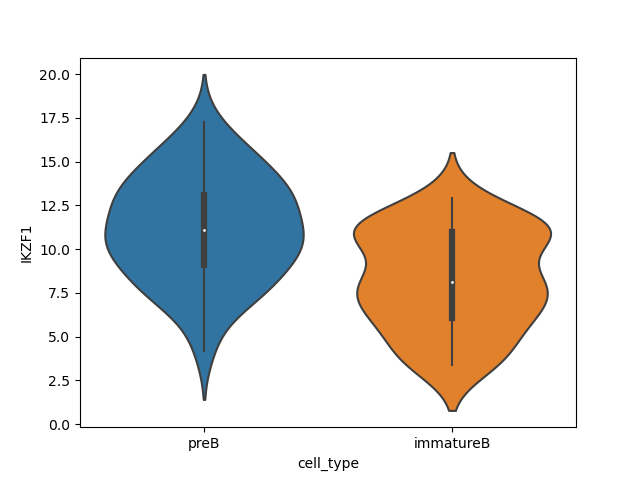

In [4]:
with Image.open("./figures/IKZF1_expression_by_cell_type.png") as im:
    display(im)

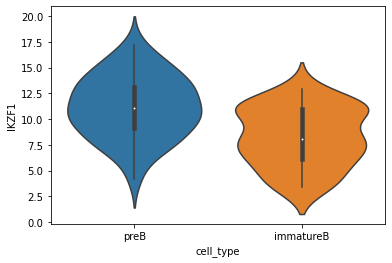

In [14]:
# exercise: try to replicate the plot above.
# plot the IKZF1 gene expression distribution separately for immature naive and pre-B cells through a violin plot.

# importing seaborn
import seaborn as sn

# your code here
# importing seaborn
import seaborn as sn
import matplotlib.pyplot as plt

# رسم توزيع تعبير IKZF1 لكل نوع خلية
sn.violinplot(
    data = data,
    x    = "cell_type",
    y    = "IKZF1"
)

plt.xlabel("cell_type")
plt.ylabel("IKZF1")
plt.show()


The plot shows that pre-B cells have higher IKZF1 expression that immature naive B cells. Good job! Can you now show the IKZF1 gene expression distribution for each combination of cell type and gender values?

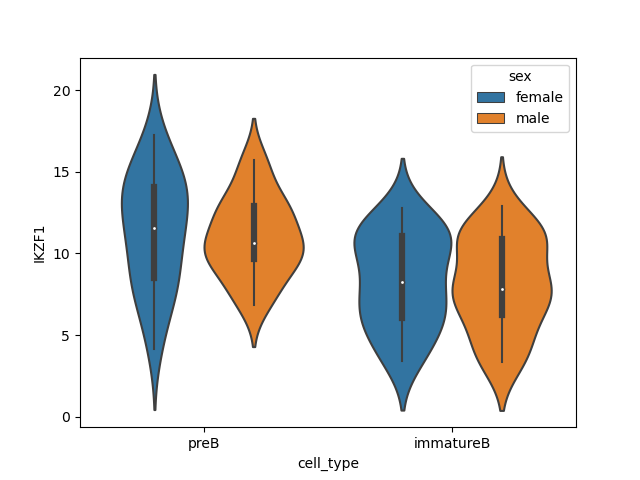

In [6]:
with Image.open("./figures/IKZF1_expression_by_cell_type_and_sex.png") as im:
    display(im)

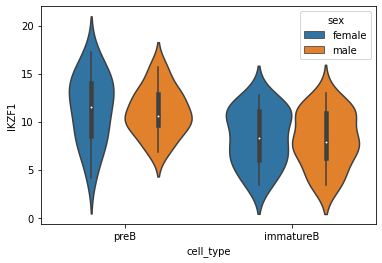

In [13]:
# exercise: try to replicate the plot above.
# plot the IKZF1 gene expression distribution through a violin plot, separately for 
# - immature naive B cells in female subjects
# - pre-B cells in female subjects
# - immature naive B cells in male subjects
# - pre-B cells in male subjects

# your code here
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sn.violinplot(
    data      = data,
    x         = "cell_type",   # preB / immatureB
    y         = "IKZF1",       # قيم التعبير
    hue       = "sex",         # female / male
    order     = ["preB", "immatureB"],
    hue_order = ["female", "male"]
)

plt.xlabel("cell_type")
plt.ylabel("IKZF1")
plt.legend(title="sex")
plt.show()


This last plot shows that there is no relevant difference between the two gender. Good to know!

Last plot: we want a scatterplot showing the relationship between IKZF1 and MYC expression values. We would also like to overlay a linear regression line over the scatterplot. Luckily, seaborn has a function that provides exactly this: [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html).

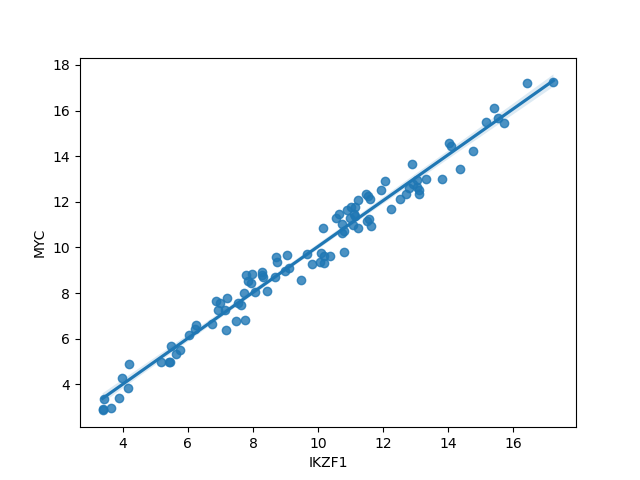

In [8]:
with Image.open("./figures/IKZF1_MYC_regression.png") as im:
    display(im)

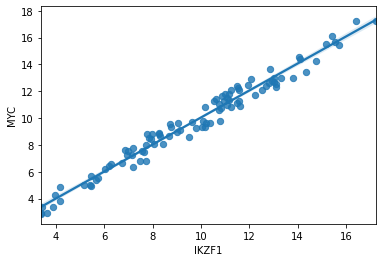

In [12]:
# exercise: try to replicate the plot above.
# use the regplot function from seaborn to build a scatterplot between IKZF1 and MYC with a 
# justaxposed linear regression line 

# your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.regplot(
    data=data,      # الـ DataFrame اللي فيه القيم
    x="IKZF1",      # المحور السيني
    y="MYC",        # المحور الصادي
    scatter_kws={"s": 40},      # حجم النقاط (اختياري)
    line_kws={"color": "tab:blue"}  # لون خط الانحدار (اختياري)
)

plt.xlabel("IKZF1")
plt.ylabel("MYC")
plt.show()
